[Reference](https://medium.com/@nesrine.ammar/beginners-guide-for-time-series-date-functionality-fe2d542925ef)

Pandas has good features for handling the time series data. I will show you this below the steps:

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Timestamps and Periods

## Timestamp
It is a basic type of time series data related with points in time.

In [3]:
pd.Timestamp('06/10/2020 5:15 PM')

Timestamp('2020-06-10 17:15:00')

In [5]:
pd.Timestamp(2020, 10, 6, 5, 15)

Timestamp('2020-10-06 05:15:00')

In [6]:
pd.Timestamp(year=2020, month=10, day=6, hour=5, minute=15)

Timestamp('2020-10-06 05:15:00')

## Period
It is related with a time span.

In [7]:
pd.Period('10/2020')

Period('2020-10', 'M')

In [8]:
pd.Period('06/10/2020')

Period('2020-06-10', 'D')

## DatetimeIndex

In [9]:
df1 = pd.Series(list('123'), [pd.Timestamp('2020/10/01'),
                              pd.Timestamp('2020/10/02'),
                              pd.Timestamp('2020/10/03')])

In [10]:
df1

2020-10-01    1
2020-10-02    2
2020-10-03    3
dtype: object

In [11]:
type(df1.index)

pandas.core.indexes.datetimes.DatetimeIndex

## PeriodIndex

In [12]:
df2 = pd.Series(list('123'), [pd.Period('2020/10'),
                              pd.Period('2020/11'),
                              pd.Period('2020/12')])

In [13]:
df2

2020-10    1
2020-11    2
2020-12    3
Freq: M, dtype: object

In [14]:
type(df2.index)

pandas.core.indexes.period.PeriodIndex

# Converting to Datatime

In [23]:
df = ['2020/01/01', '2 January 2020', '2020/01/03', 'January 3 2020']
df3 = pd.DataFrame(np.random.randint(1,100, (4,2)),
                   index=df, columns=list('12'))

In [24]:
df3

,1,2
2020/01/01,3,25
2 January 2020,60,63
2020/01/03,38,46
January 3 2020,14,48


In [25]:
df3.index = pd.to_datetime(df3.index)
df3

,1,2
2020-01-01,3,25
2020-01-02,60,63
2020-01-03,38,46
2020-01-03,14,48


In [26]:
pd.to_datetime('2020/10/06')

Timestamp('2020-10-06 00:00:00')

In [27]:
df4 = pd.DataFrame({ 'name':['Kang','Kim','Lee','Choi','Park'], 'date_of_birth':['2010-03-05', '1989-11-13', '2010-01-01', '1985-05-18', '1994-10-23'],})

datetime_index = pd.DatetimeIndex(df4['date_of_birth'].values)
df4 = df4.set_index(datetime_index)
df4.drop('date_of_birth',axis=1,inplace=True)

In [28]:
df4

,name
2010-03-05,Kang
1989-11-13,Kim
2010-01-01,Lee
1985-05-18,Choi
1994-10-23,Park


# Timedeltas
It is an absolute time duration.

In [29]:
pd.Timestamp('2020-10-06')-pd.Timestamp('2020-10-08')

Timedelta('-2 days +00:00:00')

In [30]:
pd.Timestamp('2020-10-06')+pd.Timedelta('12D')

Timestamp('2020-10-18 00:00:00')

In [31]:
pd.Timestamp('2020-10-06 9:00')+pd.Timedelta('12D 5S')

Timestamp('2020-10-18 09:00:05')

# Handling with dates in Dataframe

In [34]:
dates = pd.date_range(start='1/1/2020', periods=10, freq='1M')

In [35]:
dates

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31'],
              dtype='datetime64[ns]', freq='M')

In [38]:
df5 = pd.DataFrame({'first count': 40 + np.random.randint(0,60, 10),
                    'second count': 40 + np.random.randint(0,60, 10)},
                   index=dates)

In [39]:
df5

,first count,second count
2020-01-31,92,76
2020-02-29,75,71
2020-03-31,73,94
2020-04-30,96,62
2020-05-31,70,99
2020-06-30,73,53
2020-07-31,80,95
2020-08-31,40,92
2020-09-30,84,58
2020-10-31,63,63


In [40]:
df5.diff()

,first count,second count
2020-01-31,NaN,NaN
2020-02-29,-17.0,-5.0
2020-03-31,-2.0,23.0
2020-04-30,23.0,-32.0
2020-05-31,-26.0,37.0
2020-06-30,3.0,-46.0
2020-07-31,7.0,42.0
2020-08-31,-40.0,-3.0
2020-09-30,44.0,-34.0
2020-10-31,-21.0,5.0


In [43]:
df5.resample('Y').mean()

,first count,second count
2020-12-31,74.6,76.3


In [44]:
df5['2020']

,first count,second count
2020-01-31,92,76
2020-02-29,75,71
2020-03-31,73,94
2020-04-30,96,62
2020-05-31,70,99
2020-06-30,73,53
2020-07-31,80,95
2020-08-31,40,92
2020-09-30,84,58
2020-10-31,63,63


In [45]:
df5['2020-01']

,first count,second count
2020-01-31,92,76


In [46]:
df5['2020-01':]

,first count,second count
2020-01-31,92,76
2020-02-29,75,71
2020-03-31,73,94
2020-04-30,96,62
2020-05-31,70,99
2020-06-30,73,53
2020-07-31,80,95
2020-08-31,40,92
2020-09-30,84,58
2020-10-31,63,63


In [49]:
df5.asfreq('2M',method='ffill')

,first count,second count
2020-01-31,92,76
2020-03-31,73,94
2020-05-31,70,99
2020-07-31,80,95
2020-09-30,84,58


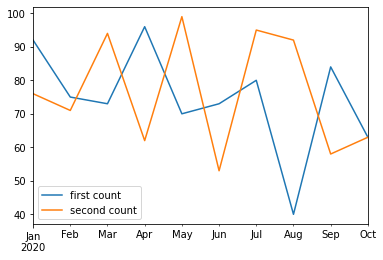

In [51]:
df5.plot()